In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
new_model = tf.keras.models.load_model('final_FER.h5')

In [2]:
frame = cv2.imread("omkar.jpg")

In [3]:
frame.shape

(1126, 1305, 3)

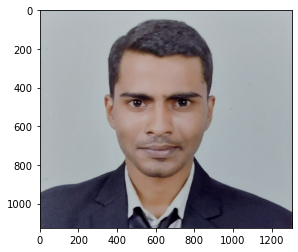

In [4]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [5]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [6]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [7]:
gray.shape

(1126, 1305)

In [8]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    facess =faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face Not Found")
    else:
        for(ex,ey,ew,eh)in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex + ew]

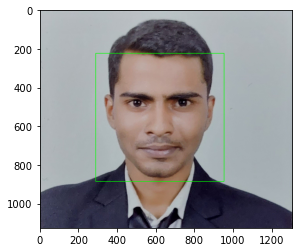

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

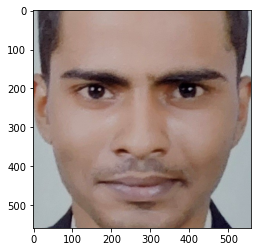

In [10]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [11]:
final_img = cv2.resize(face_roi,(224,224))
final_img = np.expand_dims(final_img,axis=0)
final_img = final_img/255.0

In [12]:
Predictions = new_model.predict(final_img)

1/1 [==============================] - 1s 1s/step


In [13]:
Predictions[0]

array([3.3220216e-03, 1.2313679e-02, 3.3754524e-05, 7.6810843e-03,
       9.7661531e-01, 7.5151074e-06, 2.6576879e-05], dtype=float32)

In [14]:
np.argmax(Predictions)

4